Thu thập và khám phá dữ liệu

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
import pandas as pd
filename = '/content/drive/MyDrive/Dataset/exams.csv'
df = pd.read_csv(filename)
print(df.shape)
df.head(5)

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [57]:
print(f"Kích thước dữ liệu: {df.shape}")

Kích thước dữ liệu: (1000, 8)


In [58]:
types = df.dtypes
print(types)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [59]:
names = list(df.columns)
print(names)

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


In [61]:
pd.isnull(df).sum().head(10)

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [62]:
duplicate_rows = df.duplicated().sum()
print(f"Số dòng bị trùng lặp: {duplicate_rows}")


Số dòng bị trùng lặp: 0


In [63]:
print(df.describe(include='all'))

       gender race/ethnicity parental level of education     lunch  \
count    1000           1000                        1000      1000   
unique      2              5                           6         2   
top      male        group C                some college  standard   
freq      508            323                         224       660   
mean      NaN            NaN                         NaN       NaN   
std       NaN            NaN                         NaN       NaN   
min       NaN            NaN                         NaN       NaN   
25%       NaN            NaN                         NaN       NaN   
50%       NaN            NaN                         NaN       NaN   
75%       NaN            NaN                         NaN       NaN   
max       NaN            NaN                         NaN       NaN   

       test preparation course   math score  reading score  writing score  
count                     1000  1000.000000    1000.000000    1000.000000  
unique 

In [64]:
df['gender'].value_counts()

,count
gender,
male,508
female,492


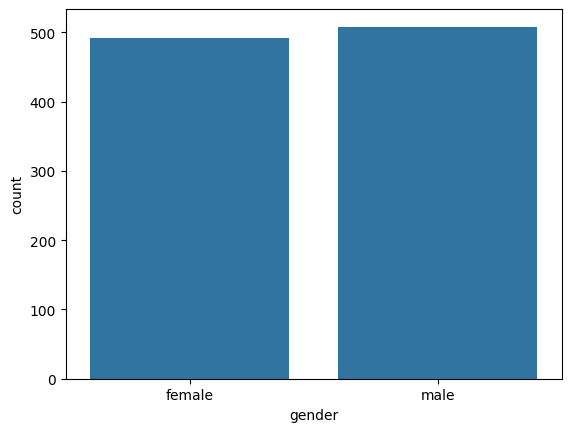

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='gender')
plt.show()


In [66]:
df['race/ethnicity'].value_counts()

,count
race/ethnicity,
group C,323
group D,257
group B,198
group E,143
group A,79


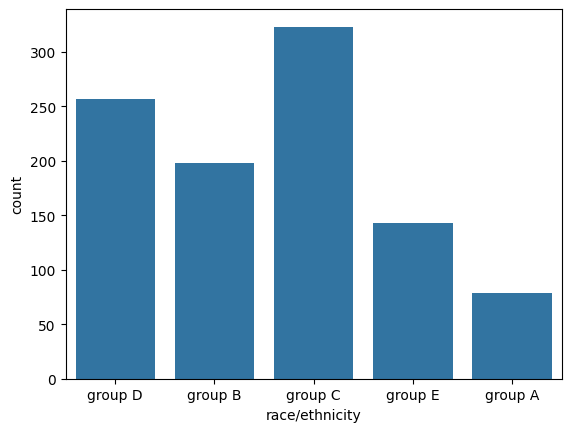

In [67]:
sns.countplot(data=df, x='race/ethnicity')
plt.show()

In [68]:
df['parental level of education'].value_counts()

,count
parental level of education,
some college,224
high school,215
associate's degree,204
some high school,177
bachelor's degree,105
master's degree,75


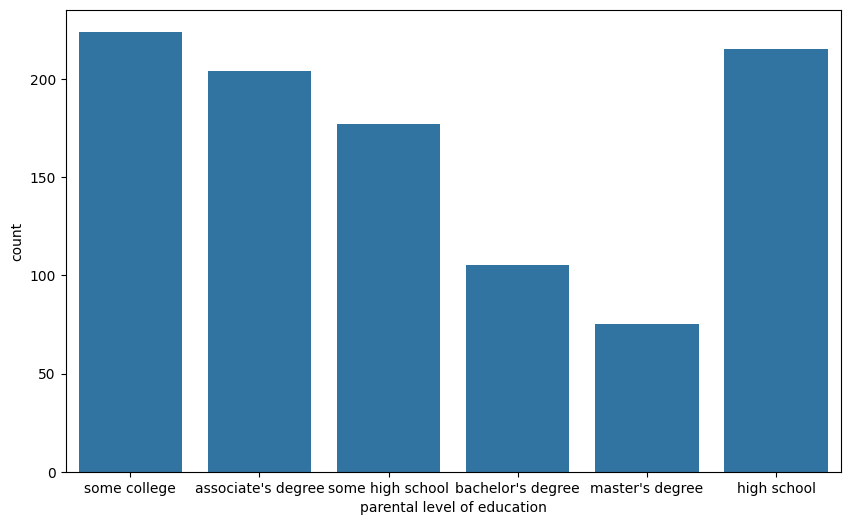

In [69]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='parental level of education')
plt.show()


In [70]:
df['lunch'].value_counts()

,count
lunch,
standard,660
free/reduced,340


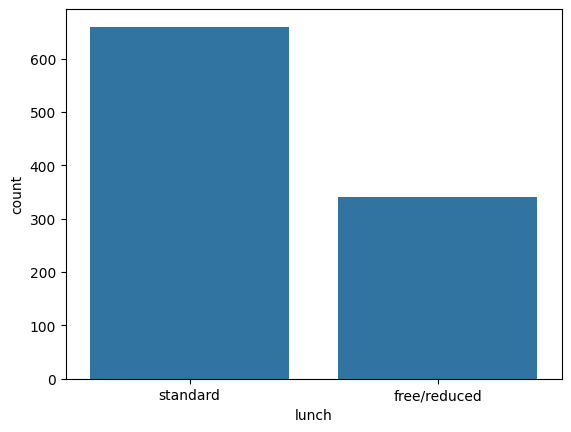

In [71]:
sns.countplot(data=df, x='lunch')
plt.show()

In [72]:
df['test preparation course'].value_counts()

,count
test preparation course,
none,656
completed,344


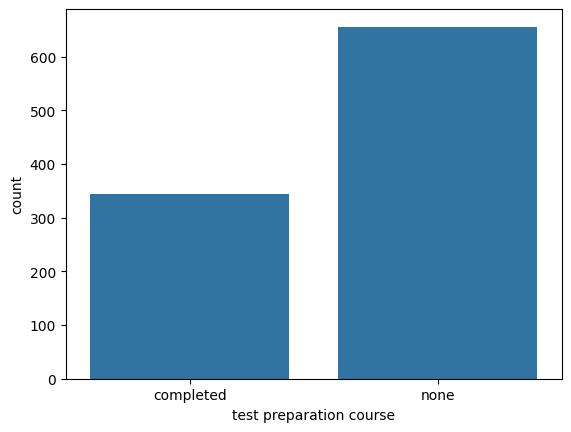

In [73]:
sns.countplot(data=df, x='test preparation course')
plt.show()

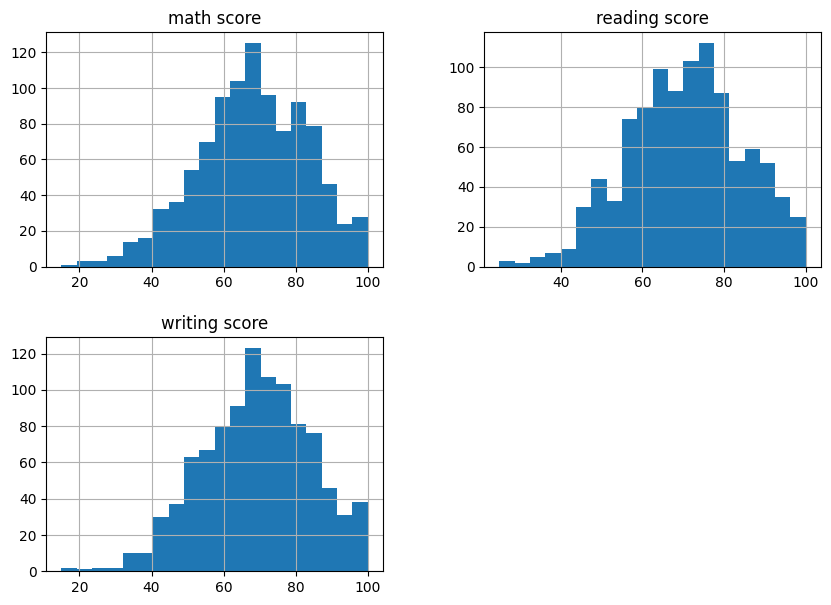

In [74]:
df[['math score', 'reading score', 'writing score']].hist(bins=20, figsize=(10, 7))
plt.show()

<Axes: xlabel='average_score', ylabel='Count'>

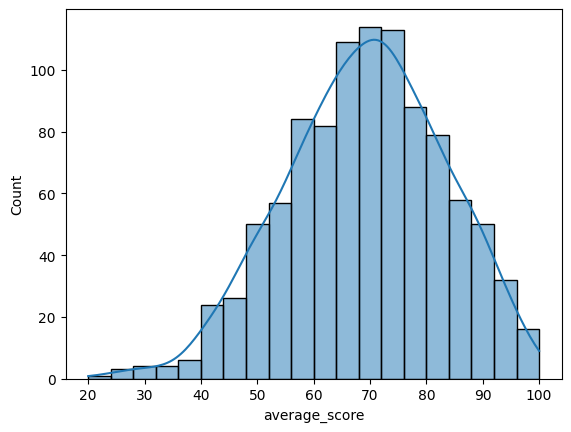

In [75]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
sns.histplot(df['average_score'], bins=20, kde=True)


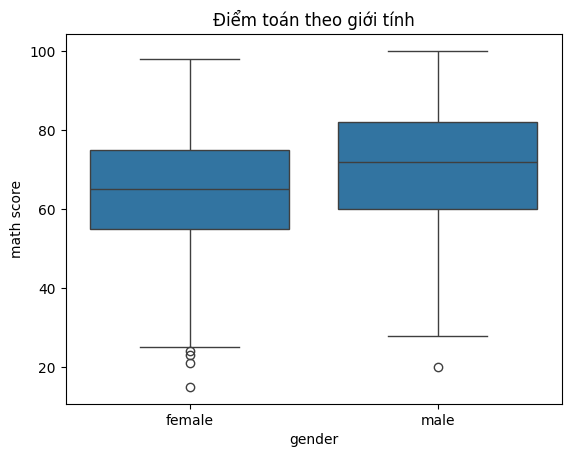

In [76]:
sns.boxplot(x='gender', y='math score', data=df)
plt.title("Điểm toán theo giới tính")
plt.show()


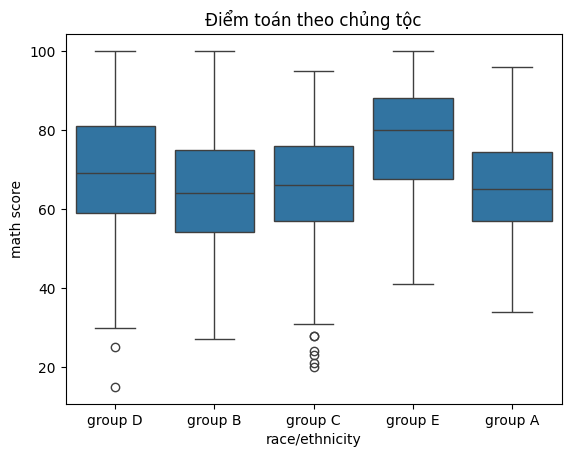

In [77]:
sns.boxplot(x='race/ethnicity', y='math score', data=df)
plt.title("Điểm toán theo chủng tộc")
plt.show()


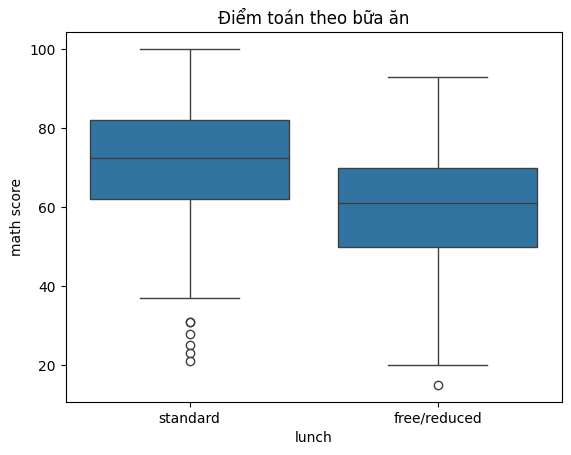

In [78]:
sns.boxplot(x='lunch', y='math score', data=df)
plt.title("Điểm toán theo bữa ăn")
plt.show()


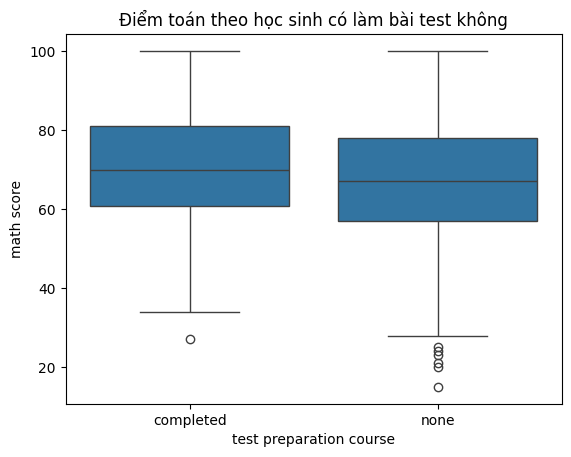

In [82]:
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title("Điểm toán theo học sinh có làm bài test không")
plt.show()


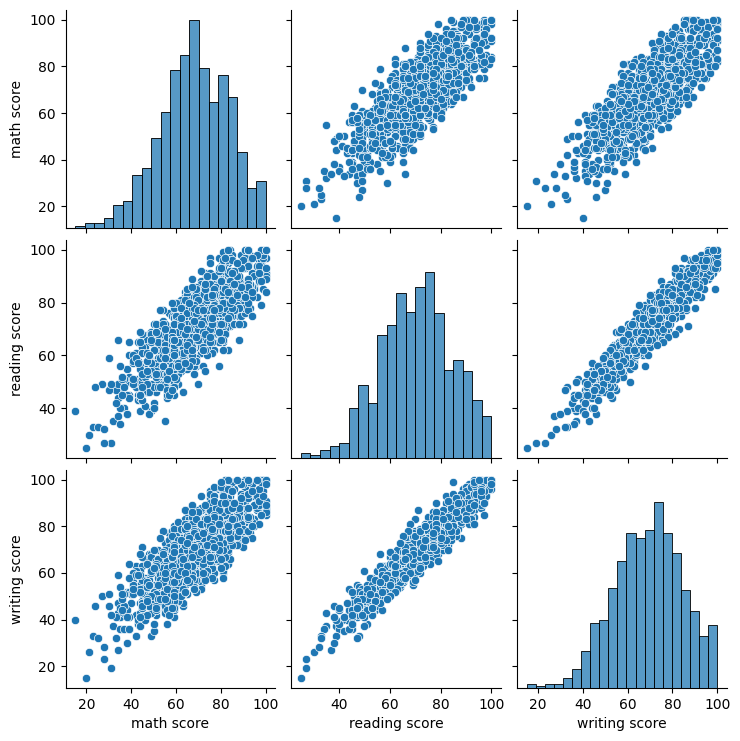

In [83]:
sns.pairplot(df[['math score', 'reading score', 'writing score']])
plt.show()

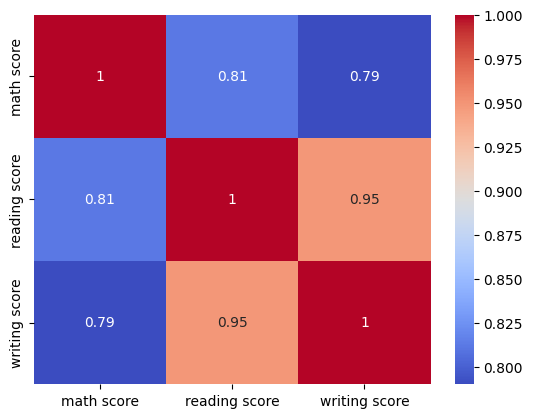

In [84]:
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='coolwarm')
plt.show()

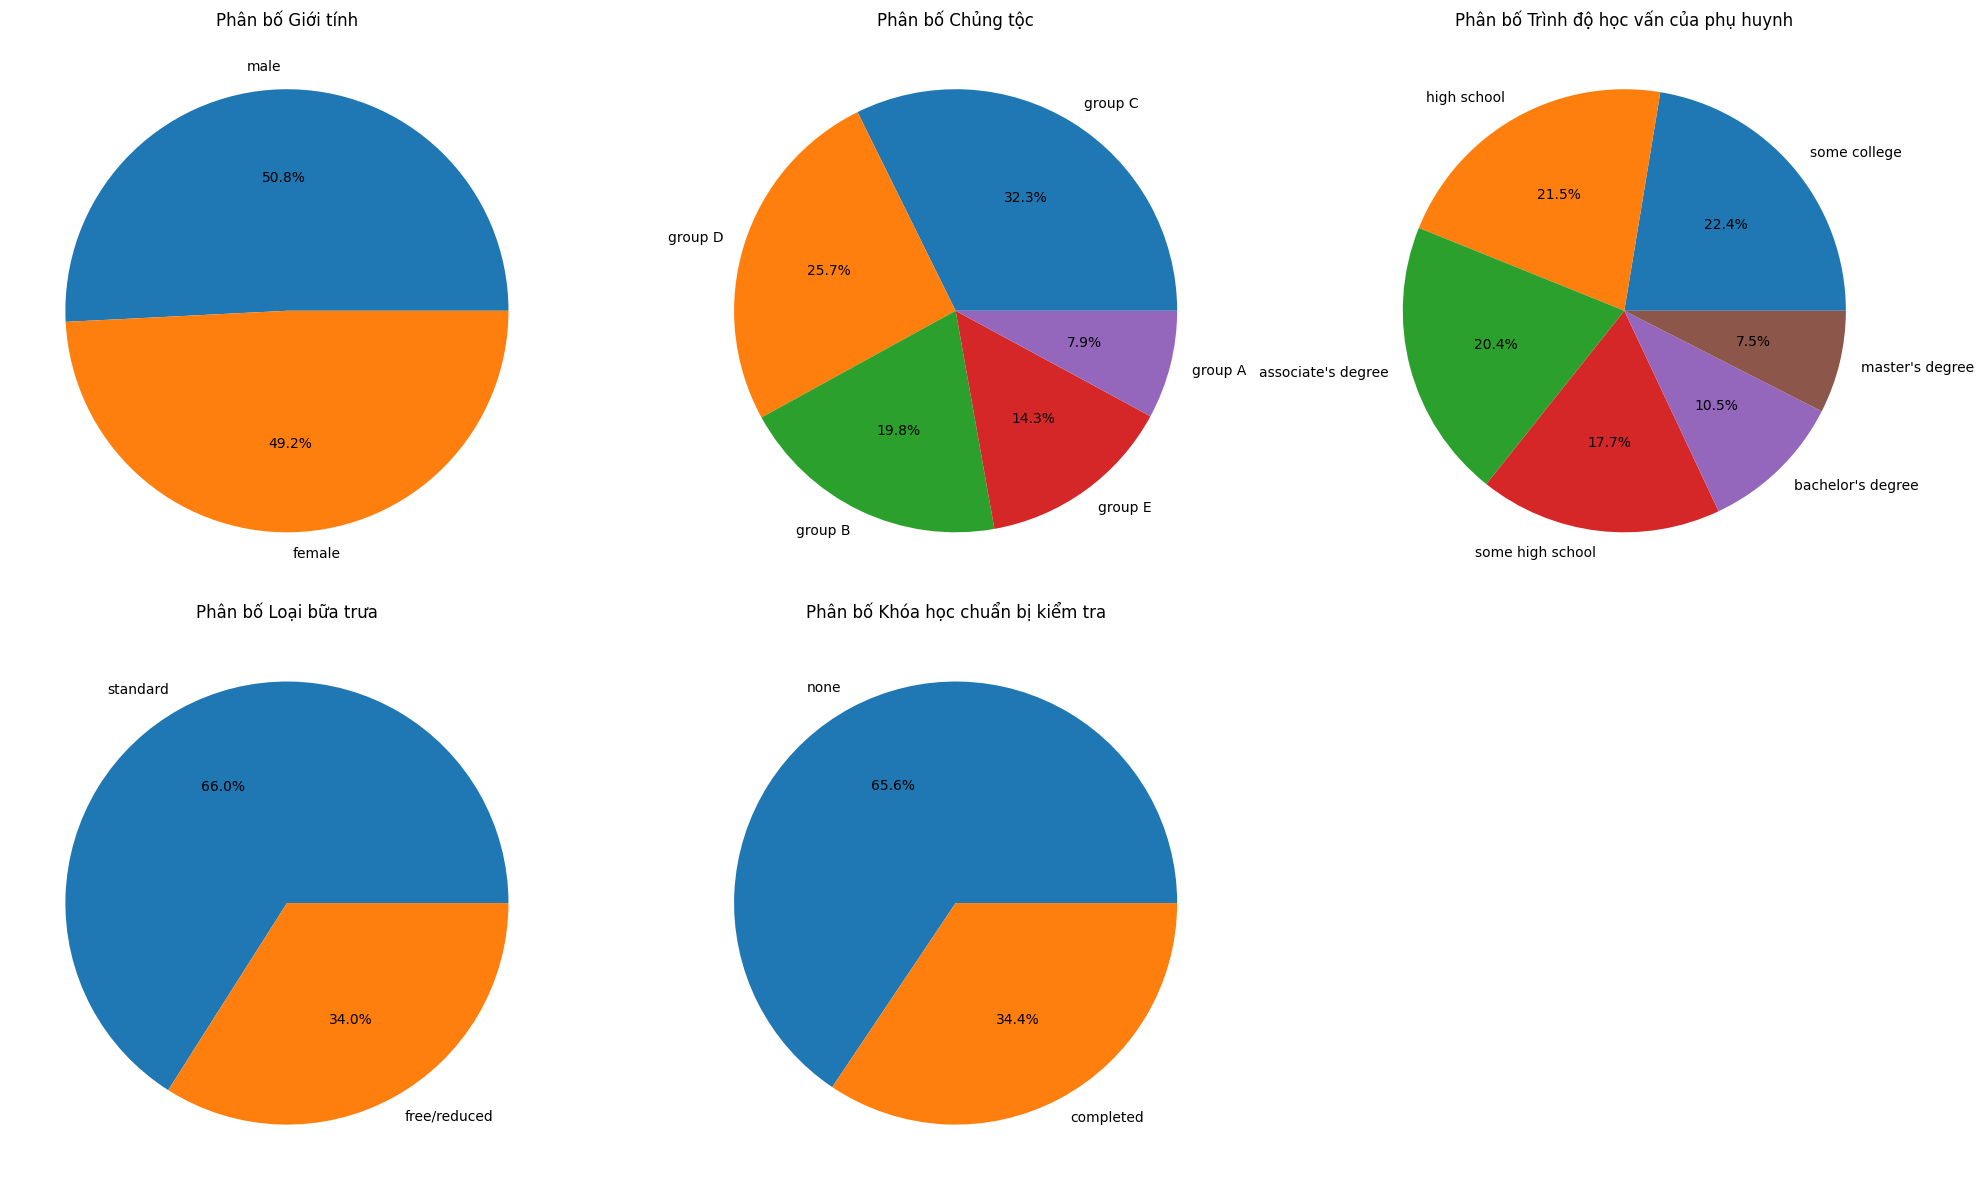

In [85]:
import matplotlib.pyplot as plt

# Tạo subplot với 2 hàng 3 cột
plt.figure(figsize=(20,12))

# 1. Biểu đồ Gender
plt.subplot(2,3,1)
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Phân bố Giới tính')

# 2. Biểu đồ Race/Ethnicity
plt.subplot(2,3,2)
race_counts = df['race/ethnicity'].value_counts()
plt.pie(race_counts.values, labels=race_counts.index, autopct='%1.1f%%')
plt.title('Phân bố Chủng tộc')

# 3. Biểu đồ Parental Education
plt.subplot(2,3,3)
education_counts = df['parental level of education'].value_counts()
plt.pie(education_counts.values, labels=education_counts.index, autopct='%1.1f%%')
plt.title('Phân bố Trình độ học vấn của phụ huynh')

# 4. Biểu đồ Lunch
plt.subplot(2,3,4)
lunch_counts = df['lunch'].value_counts()
plt.pie(lunch_counts.values, labels=lunch_counts.index, autopct='%1.1f%%')
plt.title('Phân bố Loại bữa trưa')

# 5. Biểu đồ Test Preparation
plt.subplot(2,3,5)
prep_counts = df['test preparation course'].value_counts()
plt.pie(prep_counts.values, labels=prep_counts.index, autopct='%1.1f%%')
plt.title('Phân bố Khóa học chuẩn bị kiểm tra')

plt.tight_layout()
plt.show()


Làm sạch dữ liệu và chuẩn bị dữ liệu


In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(len(types)):
  if types[i] == 'object':
    le.fit_transform(df[names[i]])
    df[names[i]] = le.fit_transform(df[names[i]])

data = df.values
print(data[:2])

[[ 0.  3.  4.  1.  0. 59. 70. 78. 69.]
 [ 1.  3.  0.  1.  1. 96. 93. 87. 92.]]


<ipython-input-86-d54a232fe2d4>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if types[i] == 'object':
<ipython-input-86-d54a232fe2d4>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if types[i] == 'object':
<ipython-input-86-d54a232fe2d4>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if types[i] == 'object':
<ipython-input-86-d54a232fe2d4>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a fu

In [87]:
X = df.drop('math score', axis=1)
y = df['math score']
print(X.shape)
print(y.shape)

(1000, 8)
(1000,)


In [88]:
# Loại bỏ cột average_score
df = df.drop('average_score', axis=1) #Cột này ban đầu tôi tạo cũng chỉ đễ khai phá kiểm tra dữ liệu nên trong mô hình tôi sẽ bỏ nó vì nếu sử dụng nó coi như bị rò rỉ thông tin

# Chia X và y
X = df.drop('math score', axis=1)
y = df['math score']

print("Shape của X:", X.shape)
print("Shape của y:", y.shape)


Shape của X: (1000, 7)
Shape của y: (1000,)


In [89]:
# 2. Xác định các cột categorical cần encode
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education',
                      'lunch', 'test preparation course']

# 3. Thực hiện encode từng cột
le = LabelEncoder()
for column in categorical_columns:
    X[column] = le.fit_transform(X[column])

In [90]:
print("Dữ liệu sau khi encode (5 dòng đầu):")
print(X.head())
print("\nShape của X:", X.shape)

Dữ liệu sau khi encode (5 dòng đầu):
   gender  race/ethnicity  parental level of education  lunch  \
0       0               3                            4      1   
1       1               3                            0      1   
2       0               3                            4      0   
3       1               1                            4      0   
4       0               3                            0      1   

   test preparation course  reading score  writing score  
0                        0             70             78  
1                        1             93             87  
2                        1             76             77  
3                        1             70             63  
4                        1             85             86  

Shape của X: (1000, 7)


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   race/ethnicity               1000 non-null   int64
 2   parental level of education  1000 non-null   int64
 3   lunch                        1000 non-null   int64
 4   test preparation course      1000 non-null   int64
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
dtypes: int64(8)
memory usage: 62.6 KB


In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled[0])

[0.         0.75       0.8        1.         0.         0.6
 0.74117647]


Modeling: Xây dựng và đánh giá các mô hình khai thác dữ liệu

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split \
(X_scaled,y,random_state=42)

In [114]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [102]:
# Khởi tạo các mô hình
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVM': SVR(kernel='rbf'),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'XGBoost': XGBRegressor(random_state=42)
}


# Huấn luyện từng mô hình
for name, model in models.items():
    print(f"Đang huấn luyện mô hình {name}...")
    model.fit(X_train, y_train)
    display(model)


Đang huấn luyện mô hình Linear Regression...


LinearRegression()

Đang huấn luyện mô hình Decision Tree...


DecisionTreeRegressor(random_state=42)

Đang huấn luyện mô hình Random Forest...


RandomForestRegressor(random_state=42)

Đang huấn luyện mô hình SVM...


SVR()

Đang huấn luyện mô hình KNN...


KNeighborsRegressor()

Đang huấn luyện mô hình Naive Bayes...


GaussianNB()

Đang huấn luyện mô hình Logistic Regression...


LogisticRegression()

Đang huấn luyện mô hình XGBoost...


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Tạo dictionary để lưu kết quả đánh giá
evaluation_results = {}

# Đánh giá từng mô hình
for name, model in models.items():
    # Dự đoán trên tập test
    y_pred = model.predict(X_test)

    # Tính các metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Lưu kết quả
    evaluation_results[name] = {
        'MSE': round(mse, 2),
        'RMSE': round(rmse, 2),
        'MAE': round(mae, 2),
        'R²': round(r2, 2)
    }

# In kết quả đánh giá cho từng mô hình
print("\n" + "="*50)
print("ĐÁNH GIÁ HIỆU SUẤT CÁC MÔ HÌNH")
print("="*50)

for model_name, metrics in evaluation_results.items():
    print(f"\n{model_name.upper()}")
    print("-"*30)
    print(f"MSE:  {metrics['MSE']:.2f}")
    print(f"RMSE: {metrics['RMSE']:.2f}")
    print(f"MAE:  {metrics['MAE']:.2f}")
    print(f"R²:   {metrics['R²']:.2f}")

# Tìm mô hình tốt nhất dựa trên R²
best_model = max(evaluation_results.items(), key=lambda x: x[1]['R²'])
print("\n" + "="*50)
print(f"MÔ HÌNH TỐT NHẤT: {best_model[0]}")
print(f"R² Score: {best_model[1]['R²']:.2f}")
print("="*50)



ĐÁNH GIÁ HIỆU SUẤT CÁC MÔ HÌNH

LINEAR REGRESSION
------------------------------
MSE:  27.21
RMSE: 5.22
MAE:  4.30
R²:   0.87

DECISION TREE
------------------------------
MSE:  57.62
RMSE: 7.59
MAE:  5.98
R²:   0.73

RANDOM FOREST
------------------------------
MSE:  31.43
RMSE: 5.61
MAE:  4.53
R²:   0.85

SVM
------------------------------
MSE:  54.41
RMSE: 7.38
MAE:  5.73
R²:   0.75

KNN
------------------------------
MSE:  48.91
RMSE: 6.99
MAE:  5.52
R²:   0.77

NAIVE BAYES
------------------------------
MSE:  389.91
RMSE: 19.75
MAE:  16.21
R²:   -0.80

LOGISTIC REGRESSION
------------------------------
MSE:  116.04
RMSE: 10.77
MAE:  8.13
R²:   0.46

XGBOOST
------------------------------
MSE:  38.06
RMSE: 6.17
MAE:  4.99
R²:   0.82

MÔ HÌNH TỐT NHẤT: Linear Regression
R² Score: 0.87


In [107]:
print("\nKIỂM TRA OVERFITTING CHO CÁC MÔ HÌNH")
print("="*40)

for name, model in models.items():
    print(f"\n{name.upper()}")
    print("-"*30)

    # Dự đoán trên cả tập train và test
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Tính metrics
    train_mae = mean_absolute_error(y_train, train_pred)
    train_r2 = r2_score(y_train, train_pred)

    test_mae = mean_absolute_error(y_test, test_pred)
    test_r2 = r2_score(y_test, test_pred)

    # In kết quả
    print(f"Training MAE: {train_mae:.2f}")
    print(f"Training R²: {train_r2:.2f}")
    print(f"Test MAE: {test_mae:.2f}")
    print(f"Test R²: {test_r2:.2f}")



KIỂM TRA OVERFITTING CHO CÁC MÔ HÌNH

LINEAR REGRESSION
------------------------------
Training MAE: 4.49
Training R²: 0.87
Test MAE: 4.30
Test R²: 0.87

DECISION TREE
------------------------------
Training MAE: 0.00
Training R²: 1.00
Test MAE: 5.98
Test R²: 0.73

RANDOM FOREST
------------------------------
Training MAE: 1.85
Training R²: 0.98
Test MAE: 4.53
Test R²: 0.85

SVM
------------------------------
Training MAE: 5.90
Training R²: 0.75
Test MAE: 5.73
Test R²: 0.75

KNN
------------------------------
Training MAE: 4.88
Training R²: 0.84
Test MAE: 5.52
Test R²: 0.77

NAIVE BAYES
------------------------------
Training MAE: 15.17
Training R²: -0.57
Test MAE: 16.21
Test R²: -0.80

LOGISTIC REGRESSION
------------------------------
Training MAE: 8.29
Training R²: 0.49
Test MAE: 8.13
Test R²: 0.46

XGBOOST
------------------------------
Training MAE: 0.62
Training R²: 1.00
Test MAE: 4.99
Test R²: 0.82


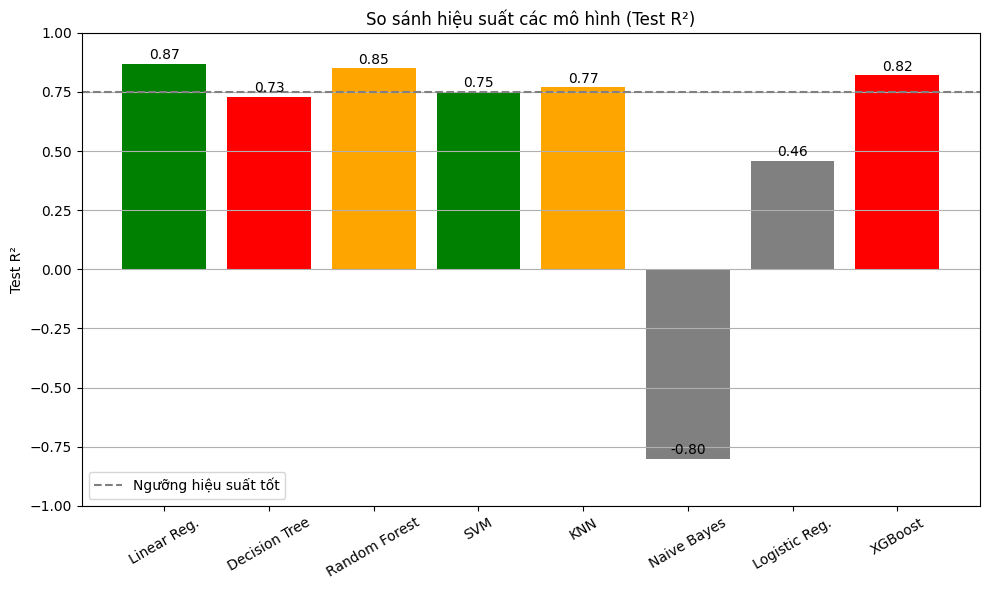

In [108]:
import matplotlib.pyplot as plt

models = ['Linear Reg.', 'Decision Tree', 'Random Forest', 'SVM', 'KNN',
          'Naive Bayes', 'Logistic Reg.', 'XGBoost']
test_r2 = [0.87, 0.73, 0.85, 0.75, 0.77, -0.80, 0.46, 0.82]
colors = ['green', 'red', 'orange', 'green', 'orange', 'gray', 'gray', 'red']  # màu theo overfit

plt.figure(figsize=(10,6))
bars = plt.bar(models, test_r2, color=colors)
plt.axhline(y=0.75, color='gray', linestyle='--', label='Ngưỡng hiệu suất tốt')
plt.title("So sánh hiệu suất các mô hình (Test R²)")
plt.ylabel("Test R²")
plt.ylim(-1, 1)
plt.legend()
plt.xticks(rotation=30)
plt.grid(axis='y')

# Ghi số liệu trên đầu cột
for bar, r2 in zip(bars, test_r2):
    plt.text(bar.get_x() + bar.get_width()/2, r2 + 0.02, f"{r2:.2f}", ha='center')

plt.tight_layout()
plt.show()
#Bạn có thể thấy trong đây sẽ có 2 mô hình Naive Bayes và logristis trong dataset này ứng dụng rất yếu
#Vì thế tôi sẽ không điều chỉnh tham số đễ chống overfitting nữa
#Tôi sẽ điều chỉnh siêu tinh chỉnh với các mô hình
# Decision Tree, Random Fores, XGBoot, KNN đễ tối ưu nhất và tôi sẽ so sánh các thuật toán


#Bạn có thể thấy trong đây sẽ có 2 mô hình Naive Bayes và logristis trong dataset này ứng dụng rất yếu
#Vì thế tôi sẽ không điều chỉnh tham số đễ chống overfitting nữa
#Tôi sẽ điều chỉnh siêu tinh chỉnh với các mô hình
# Decision Tree, Random Fores, XGBoot, KNN đễ tối ưu nhất và tôi sẽ so sánh các thuật toán

Phương pháp tinh chỉnh siêu tham số cho các thuật toán

Tinh chỉnh siêu tham số với DecissionTreeRegressor

In [109]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Danh sách giá trị để thử
depths = range(2, 11)
leaves = [1, 5, 10]

results = []

for depth in depths:
    for leaf in leaves:
        model = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=leaf, random_state=42)
        model.fit(X_train, y_train)

        # Dự đoán
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        # Tính các chỉ số
        train_mae = mean_absolute_error(y_train, train_pred)
        test_mae = mean_absolute_error(y_test, test_pred)
        train_r2 = r2_score(y_train, train_pred)
        test_r2 = r2_score(y_test, test_pred)

        results.append({
            'depth': depth,
            'leaf': leaf,
            'train_mae': train_mae,
            'test_mae': test_mae,
            'train_r2': train_r2,
            'test_r2': test_r2
        })

# Chuyển kết quả sang DataFrame để xem
results_df = pd.DataFrame(results)
results_df.sort_values(by='test_r2', ascending=False).reset_index(drop=True)


,depth,leaf,train_mae,test_mae,train_r2,test_r2
0,8,10,4.532170,4.935393,0.863623,0.823687
1,9,10,4.523951,4.967962,0.863852,0.820392
2,10,10,4.523951,4.967962,0.863852,0.820392
3,10,5,3.862461,4.993927,0.901956,0.819976
4,7,10,4.582438,4.953344,0.861006,0.817635
5,9,5,3.925665,5.098229,0.898357,0.816125
6,6,5,4.430971,4.974840,0.868790,0.815963
7,7,5,4.218740,4.942129,0.882107,0.815031
8,8,5,4.002438,5.116953,0.892991,0.811883
9,6,10,4.701426,5.070403,0.853836,0.810359


Tinh chỉnh siêu tham số với RandomForestRegressor

In [110]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = [10, 50, 100]
max_depths = [3, 5, 10]
results = []

for n in n_estimators:
    for d in max_depths:
        model = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=42)
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        results.append({
            'n_estimators': n,
            'max_depth': d,
            'train_mae': mean_absolute_error(y_train, train_pred),
            'test_mae': mean_absolute_error(y_test, test_pred),
            'train_r2': r2_score(y_train, train_pred),
            'test_r2': r2_score(y_test, test_pred)
        })

pd.DataFrame(results).sort_values(by='test_r2', ascending=False).reset_index(drop=True)


,n_estimators,max_depth,train_mae,test_mae,train_r2,test_r2
0,50,10,2.219253,4.479091,0.967167,0.857818
1,100,10,2.202811,4.490281,0.967939,0.857572
2,10,10,2.398371,4.618308,0.960169,0.845898
3,100,5,4.340356,4.699947,0.877683,0.841159
4,50,5,4.358143,4.730425,0.876397,0.838557
5,10,5,4.461983,4.889786,0.871032,0.826661
6,100,3,5.533446,5.525804,0.799631,0.774137
7,50,3,5.614346,5.687211,0.792387,0.761560
8,10,3,5.848116,6.125776,0.775859,0.727037


Tin chỉnh siêu tham số với SVM

In [111]:
from sklearn.svm import SVR

Cs = [0.1, 1, 10]
epsilons = [0.1, 0.2, 0.5]
results = []

for C in Cs:
    for eps in epsilons:
        model = SVR(C=C, epsilon=eps)
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        results.append({
            'C': C,
            'epsilon': eps,
            'train_mae': mean_absolute_error(y_train, train_pred),
            'test_mae': mean_absolute_error(y_test, test_pred),
            'train_r2': r2_score(y_train, train_pred),
            'test_r2': r2_score(y_test, test_pred)
        })

pd.DataFrame(results).sort_values(by='test_r2', ascending=False).reset_index(drop=True)


,C,epsilon,train_mae,test_mae,train_r2,test_r2
0,10.0,0.5,4.166840,4.543891,0.870646,0.845706
1,10.0,0.2,4.144190,4.566322,0.870074,0.843477
2,10.0,0.1,4.138480,4.572294,0.869914,0.843085
3,1.0,0.1,5.904861,5.733787,0.754245,0.748153
4,1.0,0.2,5.916499,5.750783,0.753404,0.747234
5,1.0,0.5,5.931428,5.768286,0.752842,0.747224
6,0.1,0.5,10.978442,10.349209,0.213492,0.217198
7,0.1,0.1,10.979686,10.352680,0.213258,0.217141
8,0.1,0.2,10.979868,10.357802,0.213494,0.216849


Tinh chỉnh siêu tham số với KNN


In [112]:
from sklearn.neighbors import KNeighborsRegressor

neighbors = [3, 5, 7, 9]
weights = ['uniform', 'distance']
results = []

for k in neighbors:
    for w in weights:
        model = KNeighborsRegressor(n_neighbors=k, weights=w)
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        results.append({
            'n_neighbors': k,
            'weights': w,
            'train_mae': mean_absolute_error(y_train, train_pred),
            'test_mae': mean_absolute_error(y_test, test_pred),
            'train_r2': r2_score(y_train, train_pred),
            'test_r2': r2_score(y_test, test_pred)
        })

pd.DataFrame(results).sort_values(by='test_r2', ascending=False).reset_index(drop=True)


,n_neighbors,weights,train_mae,test_mae,train_r2,test_r2
0,5,distance,0.000000,5.339459,1.000000,0.784540
1,7,distance,0.000000,5.285207,1.000000,0.782972
2,5,uniform,4.875733,5.521600,0.837618,0.773640
3,9,distance,0.000000,5.436429,1.000000,0.772757
4,3,distance,0.000000,5.404677,1.000000,0.769620
5,7,uniform,5.203810,5.481714,0.818114,0.767458
6,3,uniform,4.338667,5.412000,0.874075,0.766867
7,9,uniform,5.507111,5.725333,0.793615,0.749472


In [134]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, random_state=42),  # tuned
    'Random Forest': RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42),       # tuned
    'SVM': SVR(C=10.0, epsilon=0.5, kernel='rbf'),   #T                                              # tuned
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'XGBoost': XGBRegressor(random_state=42)
}


In [135]:
for name, model in models.items():
    print(f"Đang huấn luyện mô hình {name}...")
    # Call .fit() on the individual model object, not the dictionary
    model.fit(X_train, y_train)
    display(model)

Đang huấn luyện mô hình Linear Regression...


LinearRegression()

Đang huấn luyện mô hình Decision Tree...


DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, random_state=42)

Đang huấn luyện mô hình Random Forest...


RandomForestRegressor(max_depth=10, n_estimators=50, random_state=42)

Đang huấn luyện mô hình SVM...


SVR(C=10.0, epsilon=0.5)

Đang huấn luyện mô hình KNN...


KNeighborsRegressor()

Đang huấn luyện mô hình Naive Bayes...


GaussianNB()

Đang huấn luyện mô hình Logistic Regression...


LogisticRegression()

Đang huấn luyện mô hình XGBoost...


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [122]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Tạo dictionary để lưu kết quả đánh giá
evaluation_results = {}

# Đánh giá từng mô hình
for name, model in models.items():
    # Dự đoán trên tập test
    y_pred = model.predict(X_test)

    # Tính các metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Lưu kết quả
    evaluation_results[name] = {
        'MSE': round(mse, 2),
        'RMSE': round(rmse, 2),
        'MAE': round(mae, 2),
        'R²': round(r2, 2)
    }

# In kết quả đánh giá cho từng mô hình
print("\n" + "="*50)
print("ĐÁNH GIÁ HIỆU SUẤT CÁC MÔ HÌNH")
print("="*50)

for model_name, metrics in evaluation_results.items():
    print(f"\n{model_name.upper()}")
    print("-"*30)
    print(f"MSE:  {metrics['MSE']:.2f}")
    print(f"RMSE: {metrics['RMSE']:.2f}")
    print(f"MAE:  {metrics['MAE']:.2f}")
    print(f"R²:   {metrics['R²']:.2f}")

# Tìm mô hình tốt nhất dựa trên R²
best_model = max(evaluation_results.items(), key=lambda x: x[1]['R²'])
print("\n" + "="*50)
print(f"MÔ HÌNH TỐT NHẤT: {best_model[0]}")
print(f"R² Score: {best_model[1]['R²']:.2f}")
print("="*50)



ĐÁNH GIÁ HIỆU SUẤT CÁC MÔ HÌNH

LINEAR REGRESSION
------------------------------
MSE:  27.21
RMSE: 5.22
MAE:  4.30
R²:   0.87

DECISION TREE
------------------------------
MSE:  38.81
RMSE: 6.23
MAE:  4.97
R²:   0.82

RANDOM FOREST
------------------------------
MSE:  30.72
RMSE: 5.54
MAE:  4.48
R²:   0.86

SVM
------------------------------
MSE:  33.34
RMSE: 5.77
MAE:  4.54
R²:   0.85

KNN
------------------------------
MSE:  48.91
RMSE: 6.99
MAE:  5.52
R²:   0.77

NAIVE BAYES
------------------------------
MSE:  389.91
RMSE: 19.75
MAE:  16.21
R²:   -0.80

LOGISTIC REGRESSION
------------------------------
MSE:  116.04
RMSE: 10.77
MAE:  8.13
R²:   0.46

XGBOOST
------------------------------
MSE:  38.06
RMSE: 6.17
MAE:  4.99
R²:   0.82

MÔ HÌNH TỐT NHẤT: Linear Regression
R² Score: 0.87


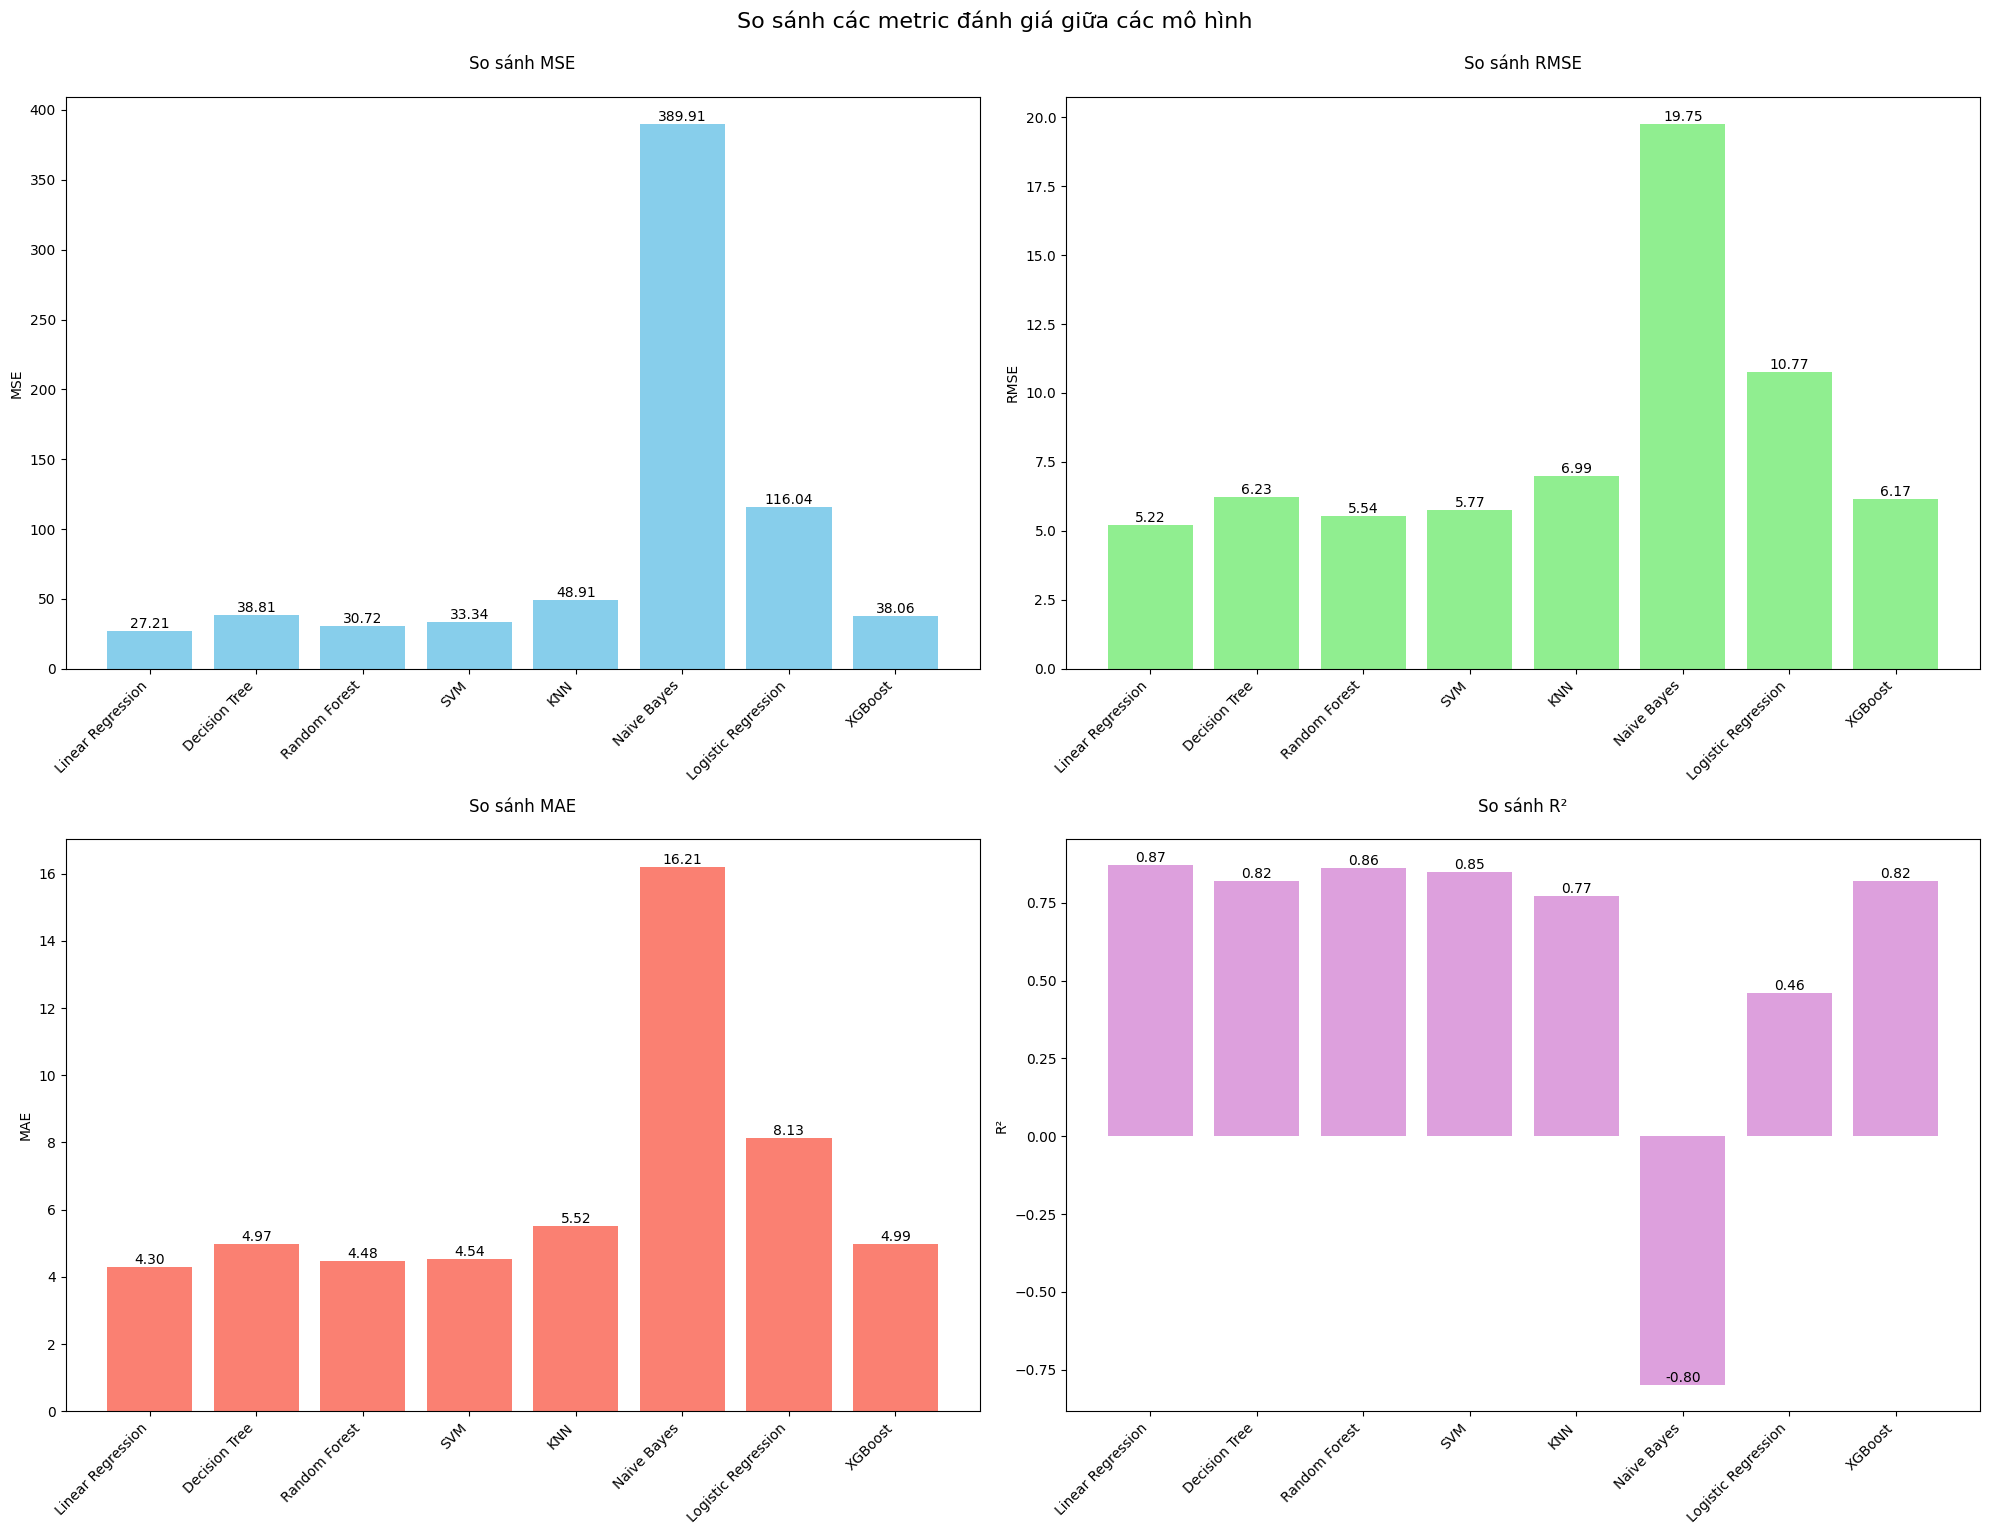

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'Logistic Regression', 'XGBoost']
mse = [27.21, 38.81, 30.72, 33.34, 48.91, 389.91, 116.04, 38.06]
rmse = [5.22, 6.23, 5.54, 5.77, 6.99, 19.75, 10.77, 6.17]
mae = [4.30, 4.97, 4.48, 4.54, 5.52, 16.21, 8.13, 4.99]
r2 = [0.87, 0.82, 0.86, 0.85, 0.77, -0.80, 0.46, 0.82]

# Thiết lập kích thước figure
plt.figure(figsize=(20, 15))

# Tạo subplot
plt.subplot(2, 2, 1)
plt.bar(models, mse, color='skyblue')
plt.title('So sánh MSE', fontsize=12, pad=20)
plt.xticks(rotation=45, ha='right')
plt.ylabel('MSE')
# Thêm giá trị lên đầu mỗi cột
for i, v in enumerate(mse):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.subplot(2, 2, 2)
plt.bar(models, rmse, color='lightgreen')
plt.title('So sánh RMSE', fontsize=12, pad=20)
plt.xticks(rotation=45, ha='right')
plt.ylabel('RMSE')
for i, v in enumerate(rmse):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.subplot(2, 2, 3)
plt.bar(models, mae, color='salmon')
plt.title('So sánh MAE', fontsize=12, pad=20)
plt.xticks(rotation=45, ha='right')
plt.ylabel('MAE')
for i, v in enumerate(mae):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.subplot(2, 2, 4)
plt.bar(models, r2, color='plum')
plt.title('So sánh R²', fontsize=12, pad=20)
plt.xticks(rotation=45, ha='right')
plt.ylabel('R²')
for i, v in enumerate(r2):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Điều chỉnh layout
plt.tight_layout()

# Thêm tiêu đề chính
plt.suptitle('So sánh các metric đánh giá giữa các mô hình', fontsize=16, y=1.02)

# Hiển thị biểu đồ
plt.show()


**Deployment: Triển khai mô hình vào thực tế (nếu có thể).**

In [140]:
import pickle

# Giả sử bạn chọn Linear Regression là mô hình tốt nhất
best_model = models['Linear Regression']

# Lưu mô hình ra file
with open('/content/drive/MyDrive/Dataset/best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


In [149]:
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# 1. Load model
with open('/content/drive/MyDrive/Dataset/best_model.pkl', 'rb') as f:
    model = pickle.load(f)

# 2. Load dữ liệu mới
new_df = pd.read_csv('/content/drive/MyDrive/Dataset/new_students.csv')

# 3. Xử lý categorical features giống như lúc training
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education',
                      'lunch', 'test preparation course']

# Áp dụng Label Encoding
le = LabelEncoder()
for column in categorical_columns:
    new_df[column] = le.fit_transform(new_df[column])

# 4. Scale dữ liệu
scaler = MinMaxScaler()
X_new = scaler.fit_transform(new_df)

# 5. Dự đoán
predicted_scores = model.predict(X_new)

# 6. Thêm kết quả vào DataFrame gốc
new_df['Predicted math score'] = predicted_scores

# 7. Hiển thị kết quả
print("\nKết quả dự đoán điểm toán:")
print(new_df[['gender', 'race/ethnicity', 'parental level of education',
              'Predicted math score']].head())



Kết quả dự đoán điểm toán:
   gender  race/ethnicity  parental level of education  Predicted math score
0       0               1                            1             65.101828
1       1               2                            3             51.882673
2       0               0                            0             91.483577
3       1               3                            2             28.826075
4       0               4                            3             38.963051
